# TRAINING MODELS
*This is a notebook about ML models*

## SETUP

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "chapter4_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
# Extra modules imported during the work
from sklearn.linear_model import LinearRegression

## LINEAR REGRESSION

### The Normal Equation 
*The direct “closed-form” equation*

Saving figure generated_data_plot


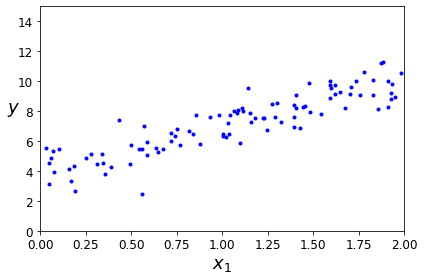

In [3]:
# Generate linear-looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [6]:
# Best fit directly using Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # parameter vector
theta_best

array([[3.86501051],
       [3.13916179]])

**Evaluate:** $\theta_{0}=4$ and $\theta_{1}=3$ but the noise makes it impossible to recover the exact parameters.

In [7]:
# Make prediction using the "trained" model
X_new = np.array([[0], [2]]) # Create two arbitrary records
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0=1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

Saving figure linear_model_predictions_plot


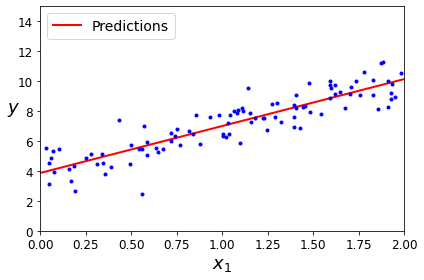

In [9]:
# Plot the model's predictions
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [11]:
# Sklearn implementation of linear regression - normal equation
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [13]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

**Remark:** `LinearRegression` class is based on the `scipy.linalg.lstsq()` function, which can be called directly.

In [14]:
# Directly call linalg.lstsq
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e6)
theta_best_svd

array([[3.86501051],
       [3.13916179]])

**Remark:** This function computes $X^{+}y$, where $X^{+}$ is the *pseudoinverse* of $X$ *(the Moore-Penrose inverse)* 

In [15]:
# Compute parameter vector through pseudoinverse
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])

**Evaluate:** Normal Equation may not work if the matrix $X^{T}X$ is not singular but pseudoinverse is always defined.

**Remark:** The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition (SVD)*.
- The computational complexity of Normal Equation is $O(n^{3})$
- The computational complexity of SVD approach is $O(n^{2})$

=> Both get very slow when the number of features grows large (e.g., 100,000)

However, prediction using Normal Equation is fast since computattional complexity is linear.

### Gradient Descent
*The iterative approach*